# GOLD PRICE PREDICTION WITH LINEAR REGRESSION AND RANDOM FOREST

### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# For models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

### Load the Data and Some Minor Cleaning

### Importing the Data into a Pandas DataFrame for further analysis

In [2]:
df = pd.read_csv('dataset/Gold_Price_Data_Final_Final.csv')

#### First 5 entries of the data

In [3]:
df.head()

,Price,Year,Month,Day
0,281.0,2000,1,4
1,283.2,2000,1,5
2,281.4,2000,1,6
3,281.9,2000,1,7
4,281.7,2000,1,10


In [4]:
df.tail()

,Price,Year,Month,Day
5701,1970.5,2022,4,13
5702,1981.6,2022,4,14
5703,1978.5,2022,4,18
5704,1981.2,2022,4,19
5705,1952.1,2022,4,20


### Handling Null Values

In [5]:
df.isnull().any()

Price    False
Year     False
Month    False
Day      False
dtype: bool

### Finding and Removing Outliers

In [6]:
from scipy import stats

In [7]:
z=np.abs(stats.zscore(df))
z

,Price,Year,Month,Day
0,1.474805,1.677273,1.584590,1.335567
1,1.470594,1.677273,1.584590,1.221453
2,1.474040,1.677273,1.584590,1.107339
3,1.473082,1.677273,1.584590,0.993225
4,1.473465,1.677273,1.584590,0.650884
...,...,...,...,...
5701,1.759744,1.735506,0.714194,0.308543
5702,1.780995,1.735506,0.714194,0.194429
5703,1.775060,1.735506,0.714194,0.262026
5704,1.780229,1.735506,0.714194,0.376139


In [8]:
threshold=3
np.where(z>threshold)

(array([], dtype=int64), array([], dtype=int64))

In [9]:
df_no_outliers=df[(z<=3).all(axis=1)]
df_no_outliers

,Price,Year,Month,Day
0,281.0,2000,1,4
1,283.2,2000,1,5
2,281.4,2000,1,6
3,281.9,2000,1,7
4,281.7,2000,1,10
...,...,...,...,...
5701,1970.5,2022,4,13
5702,1981.6,2022,4,14
5703,1978.5,2022,4,18
5704,1981.2,2022,4,19


In [10]:
df_no_outliers.shape

(5706, 4)

# Visualization

### Bar Graph

### Price base on month of a year

Text(0.5, 1.0, 'PRICE OF GOLD BASE ON MONTHS')

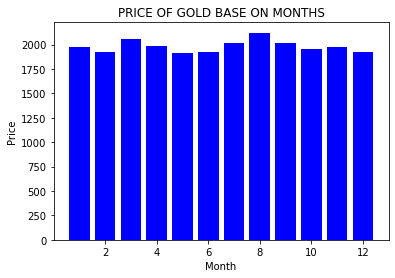

In [11]:
plt.bar(df['Month'],df['Price'],color='blue')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF GOLD BASE ON MONTHS')

### Price base on the Year

Text(0.5, 1.0, 'PRICE OF GOLD BASE ON YEAR')

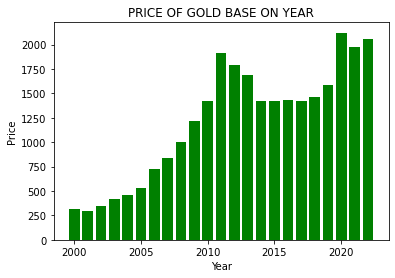

In [12]:
plt.bar(df['Year'],df['Price'],color='Green')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('PRICE OF GOLD BASE ON YEAR')

In [13]:
df

,Price,Year,Month,Day
0,281.0,2000,1,4
1,283.2,2000,1,5
2,281.4,2000,1,6
3,281.9,2000,1,7
4,281.7,2000,1,10
...,...,...,...,...
5701,1970.5,2022,4,13
5702,1981.6,2022,4,14
5703,1978.5,2022,4,18
5704,1981.2,2022,4,19


In [14]:
columns = ['Year', 'Month', 'Day', 'Price']
df = df[columns]

### Seperating Dependent and Independent variables

In [15]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [16]:
X

array([[2000,    1,    4],
       [2000,    1,    5],
       [2000,    1,    6],
       ...,
       [2022,    4,   18],
       [2022,    4,   19],
       [2022,    4,   20]])

In [17]:
Y

array([ 281. ,  283.2,  281.4, ..., 1978.5, 1981.2, 1952.1])

### Train and Test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [19]:
X_train.shape

(4279, 3)

In [20]:
Y_train.shape

(4279,)

### Model Building

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
linear_R = LinearRegression()
history = linear_R.fit(X_train, Y_train)
Y_pred_lr= linear_R.predict(X_test)
Y_pred_lr

array([ 253.19156482, 1649.35667232, 1352.53753174, ..., 1811.97798591,
       1588.94174428,  544.88402423])

In [23]:
Y_test

array([ 279.8, 1344.5, 1266.1, ..., 1825.3, 1273.4,  402.3])

### Model Evaluation For Linear Regression

### Checking Accuracy 

In [24]:
model_accuracy = linear_R.score(X_train, Y_train)


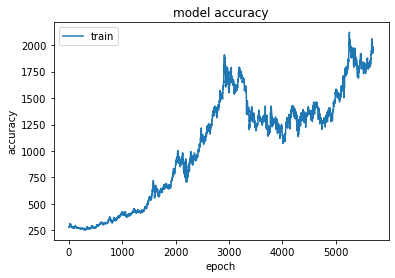

In [25]:
plt.plot(df['Price'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

### Mean Square Error

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(Y_test,Y_pred_lr)

158.2111124126755

In [27]:
mean_squared_error(Y_test,Y_pred_lr)

46565.962155947826

In [28]:
from math import sqrt
sqrt(mean_squared_error(Y_test,Y_pred_lr))

215.7914784136478

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
Random_F = RandomForestRegressor()
Random_F.fit(X_train, Y_train)
Y_pred_rf= Random_F.predict(X_test)
Y_pred_rf

array([ 279.986, 1340.937, 1282.33 , ..., 1761.419, 1274.168,  393.095])

### Checking Accuracy

In [31]:
accur_rf = Random_F.score(X_train, Y_train)


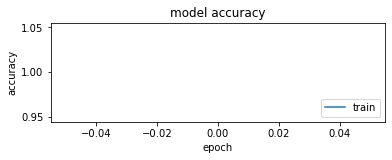

In [32]:
plt.subplot(2,1,1)
plt.plot(accur_rf)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

### Mean Square Error

In [33]:
mean_absolute_error(Y_test,Y_pred_rf)

9.695685283812187

In [34]:
mean_squared_error(Y_test,Y_pred_rf)

263.0108854973864

In [35]:
sqrt(mean_squared_error(Y_test,Y_pred_rf))

16.21761035101616